#### Scikit-learn 

Scikit-learn (often abbreviated as sklearn) is a popular open-source machine learning 

library for Python. It provides simple and efficient tools for data mining, data analysis,

and predictive modeling. It is built on top of NumPy, SciPy, and Matplotlib, making it a
 
powerful yet easy-to-use library for machine learning tasks.

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer 

all over the United States. you're tasked with creating an automated system to estimate the 

annual medical expenditure for new customers, using information such as their age, sex, BMI, 

children, smoking habits and region of residence.


Estimates from your system will be used to determine the annual insurance premium (amount 

paid every month offered to the customer. Due to regulatory requirements, you must be able 

to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the 

aforementioned information and the actual medical charges incurred by over 1300 customers.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"
df=pd.read_csv(url)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [43]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
ma

In [44]:
print(df['region'].unique())
print()
print(df['children'].unique())

['southwest' 'southeast' 'northwest' 'northeast']

[0 1 3 2 5 4]


**Linear regression**

we are using linear regression for predicting the new charges for the new customers.

first we are visualizing the the data.

first we are plotting the age using histogram

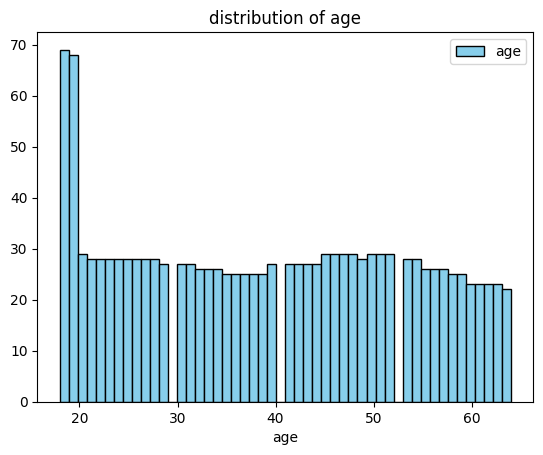

In [45]:
plt.hist(df['age'],bins=50,color='skyblue',edgecolor='black',label='age')
plt.xlabel('age')
plt.legend()
plt.title('distribution of age')
plt.show()

In [46]:
import plotly.express as px #better understanding from this plotting than matplot
fig = px.histogram (df,
x= 'age',
marginal='box',
nbins=47,
title= 'Distribution of Age')
fig. update_layout (bargap=0.1)
fig. show()

from this figure we can say age distribution is almost uniform except for 18, 19 age group, we have 

more people from 18,19 age group. But remaining of them are similar in number .

now we can look at the body mass index distribution.

In [47]:
fig=px.histogram(df,x='bmi',nbins=40,marginal='box',title='bmi distribution')
fig.update_layout(bargap=.1)
fig.show()

so the bodymass index is showing guassian distribution(normal distribution) centered at around 30.04 

with few outliners towards right. so we analysed distribution of bmi and age , we know both will 

affect health , now we are looking at charges distribution with smoker also included.

In [48]:
fig=px.histogram(df,x='charges',color='smoker',marginal='box',title='charges distribution')
fig.update_layout(bargap=0.1)
fig.show()

so we can observe smokers have higher charges , now we are just check if a region or gender have any 

relation with charges.

In [49]:
fig_1=px.histogram(df,x='charges',color='region',marginal='box',title='charges in a region')
fig_1.update_layout(bargap=.1)
fig_1.show()
fig2=px.histogram(df,x='charges',color='sex',marginal='box',title='charges with gender')
fig2.update_layout(bargap=.1)
fig2.show()

thus from this we can conclude region and gender has no effect in charges all of them have similar 

median and contribution.

In [50]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

thus 1064 people doesn't smoke and 274 people smoke, now we can check if males or females are more 

into smoking.

In [51]:
fig=px.histogram(df,x='smoker',marginal='box',color='sex')
fig.update_layout(bargap=.1)
fig.show()

thus we can see male smoker count is  a bit higher than females.But data have similar amount of male 

data counts and female data counts.

In [52]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

now can look at a scatter plot for age and charges.

In [53]:
fig=px.scatter(df,x='age',y='charges',color='smoker',opacity=.8)
fig.update_traces(marker_size=5)
fig.show()

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:  

1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have   

relatively low medical charges compared to others  

2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are  

 actually two distinct but overlapping clusters: "non-smokers with medical issues" and  

"smokers without major medical issues".  

3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues   

that are possibly related to or worsened by smoking.  

if you click on yes then yes turns off and we can see non-smokers data only , in that also there are 

some people with high charges it may due to genetic issue, major accidents etc.

now we can check the relation between BMI and charges using a scatter plot with smoker colour.

In [54]:
fig=px.scatter(df,x='bmi',y='charges',color='smoker',hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

if you look at the dot density we can see it is highest if we draw an imaginery circle between bmi 

20-40 thus showing most people falls in this bmi mostly cost only less than 15k charges, but smoker 

is leading in high charges if you turn of no, we can see that their is a sudden jump for smokers with

bmi > 30 , almost all of the them have charges greater than 30k

but in this data we are not seeing any relationship between bmi and charges, may be it is a flowed 

data.

EXERCISE: Create some more graphs to visualize how the "charges" column is related to other columns 

("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.

Hint: Use violin plots ( px.violin) and bar plots (sns. barplot )

In [55]:
fig=px.scatter(df,y='charges',x='children')
fig.show()

here the visualization is not easy as we cannot say how many points are there and the values of 

children is not continous.

thus we use violin plot for this.

In [56]:
fig=px.violin(df,y='charges',x='children')
fig.show()

The width of the violin at a given y-value shows how common that charge amount is for that group 

(wider = more common).

you can also see the wide part of violin is shifting to higher charges as children increases thus 

their is a small relation.

but there are people with very high charges with zero children also.

now we can use corr() for correlating age vs charges, bmi vs charges, smoker vs charges

In [57]:
#age vs charges correlating
print(df['age'].corr(df['charges']))
print(df.age.corr(df.charges))
print(df[['age','charges']].corr())

0.29900819333064776
0.29900819333064776
              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


In [58]:
#bmi vs charges correlating
print(df[['bmi','charges']].corr())

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


In [59]:
#for smoker we need to convert the yes ,no object to numerica to see correlation.
df['smoker_num']=df.smoker.map({'yes':1,'no':0})


print(df[['charges','smoker_num']].corr())

             charges  smoker_num
charges     1.000000    0.787251
smoker_num  0.787251    1.000000


thus we can see their is .7 correlation in smoker vs charges(high positive correlation) and .3 

correlation in age vs charges(weak positive correlation) it should be atleast .4 for moderate 

correlation.

In [60]:
#correlation with children
print(df.children.corr(df.charges))#very weak correlation

0.06799822684790487


In [61]:
#total correlation
df.select_dtypes(include=[np.number]).corr()

,age,bmi,children,charges,smoker_num
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_num,-0.025019,0.003750,0.007673,0.787251,1.000000


**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a 

cause-effect relationship between features. Two features X and Y can be correlated if X causes Y or 

if Y causes X, or if both are caused independently by some other factor Z, and the correlation will 

no longer hold true if one of the cause-effect relationships is broken. It's also possible that X are 

Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and

 decisions based on automated system can often have major consequences on society, so it's important 
 
 to study why automated systems lead to a given result. Determining cause-effect relationships 
 
 requires human insight.

**Linear Resgression using Single feature**

we know that 'smoker' and 'age' have strongest correlation with 'charges' so for non-smokers we use 

only 'age' as criteria , first let as create a dataframe which includes data of non-smokers only.

In [62]:
df_non_smoker = df[df['smoker'] == 'no']
print(df_non_smoker)

      age     sex     bmi  children smoker     region      charges  smoker_num
1      18    male  33.770         1     no  southeast   1725.55230           0
2      28    male  33.000         3     no  southeast   4449.46200           0
3      33    male  22.705         0     no  northwest  21984.47061           0
4      32    male  28.880         0     no  northwest   3866.85520           0
5      31  female  25.740         0     no  southeast   3756.62160           0
...   ...     ...     ...       ...    ...        ...          ...         ...
1332   52  female  44.700         3     no  southwest  11411.68500           0
1333   50    male  30.970         3     no  northwest  10600.54830           0
1334   18  female  31.920         0     no  northeast   2205.98080           0
1335   18  female  36.850         0     no  southeast   1629.83350           0
1336   21  female  25.800         0     no  southwest   2007.94500           0

[1064 rows x 8 columns]


**now we are plotting this using seaborn**

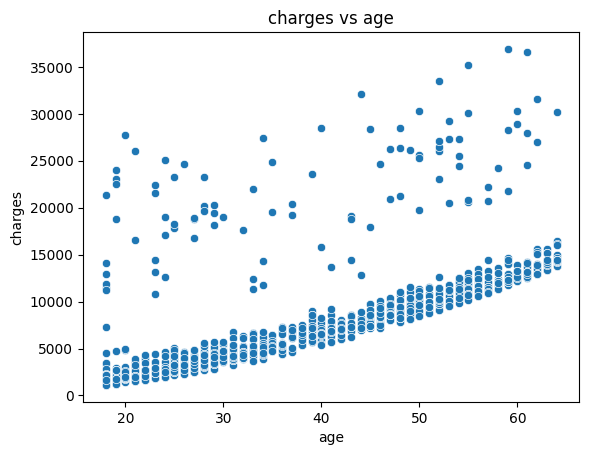

In [63]:
import seaborn as sns

plt.title('charges vs age')
sns.scatterplot(df_non_smoker,y='charges',x='age')
plt.show()

so we can actually imagine  a line even though some points are scatterd 

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this

 points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the 
 
 following formula:

y=wx+b

The line is characterized two numbers: w (called "slope") and b (called "intercept").

so our model is **charges = slope . age + intercept**

first we are creating a trial function with age,w and b as input

In [64]:
def estimate_charges(age,w,b):
    return w*age+b

#let 
w=50
b=100
age=df_non_smoker['age']
estimate_charges(age,w,b)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

now we can plot it

In [65]:
estimated_charges=estimate_charges(age,w,b)
#df_2=estimated_charges.to_frame()
df_2=pd.DataFrame({'age':age,'estimated_charges':estimated_charges})
print(df_2)

      age  estimated_charges
1      18               1000
2      28               1500
3      33               1750
4      32               1700
5      31               1650
...   ...                ...
1332   52               2700
1333   50               2600
1334   18               1000
1335   18               1000
1336   21               1150

[1064 rows x 2 columns]


In [66]:
fig=px.scatter(df_2, y='estimated_charges',x='age')
fig.show()
fig2=px.scatter(df_non_smoker,y='charges',x='age')
fig2.show()

so we can can see our w and b is not that accurate as we gave 50 and 100 in the function.

now we can create a function to brute force w and b easily.

In [67]:
def try_parameters(w,b):
    ages=df_non_smoker['age']
    target=df_non_smoker['charges']
    estimated_charges=estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges,color='red')
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.scatter(ages,target)
    plt.show()


    


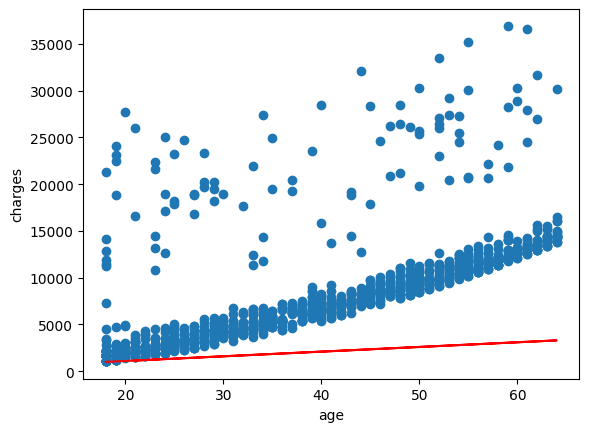

In [68]:
try_parameters(50,100)

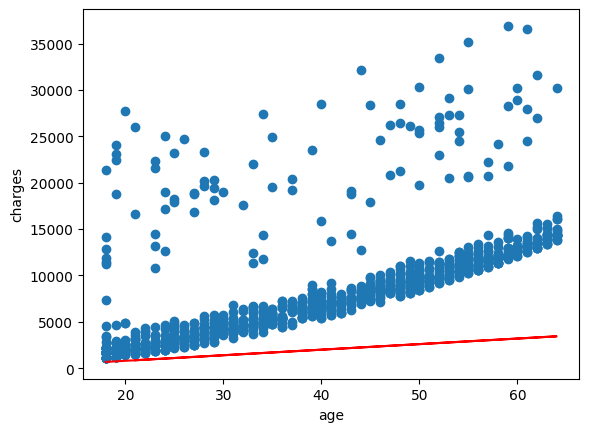

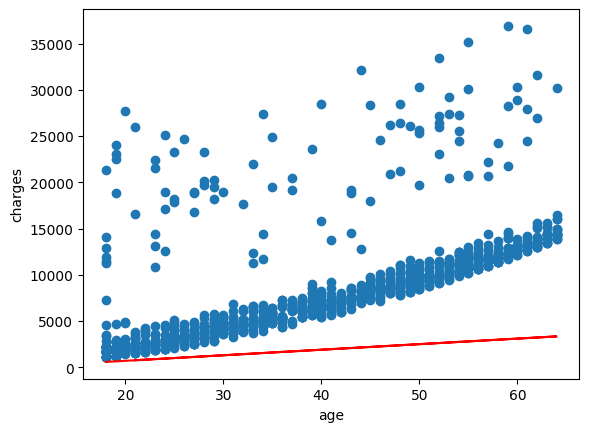

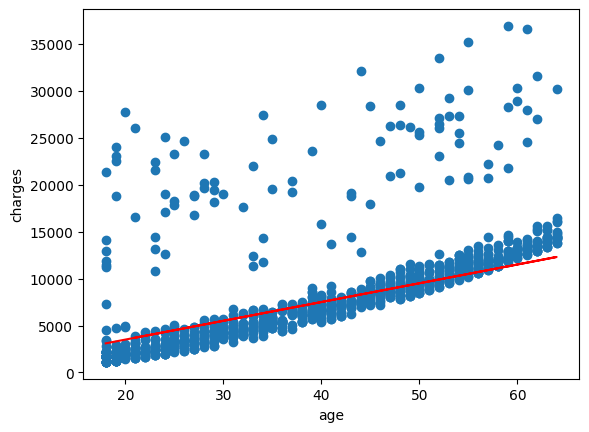

In [69]:
try_parameters(60,-400)
try_parameters(60,-500)
try_parameters(200,-500)

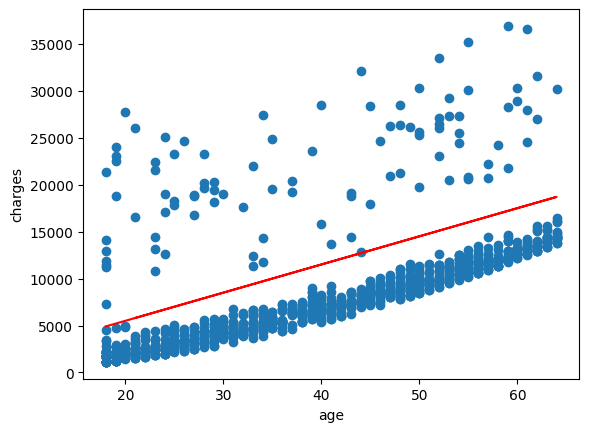

In [70]:
try_parameters(300,-500)

this looks good fit (300, -500.)

so we know about loss function and mean squared error 

- **w**: Weight vector (slopes for each feature)
- **b**: Bias (y-intercept)
**optimization**
the goal is to find or adjust correct values for w, b such that the error or diviation from actual value y is minimum
The **Mean Squared Error (MSE)** is defined as:

$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2$$

- $y_i$ = actual (observed) value
- $\hat{y}_i$ = predicted value ($\hat{y}_i = \mathbf{w}^T\mathbf{x}_i + b$)
- $N$ = number of data points

To find the best parameters $(\mathbf{w}, b)$, we minimize the MSE:

$$\min_{\mathbf{w},b} \sum_{i=1}^{N}(y_i - (\mathbf{w}^T\mathbf{x}_i + b))^2$$

so we substract $y_i$ and predicted value $\hat{y}_i$ and square it and find the minimum.


In [71]:
#the actual values are
print(df_non_smoker[['age','charges']])

      age      charges
1      18   1725.55230
2      28   4449.46200
3      33  21984.47061
4      32   3866.85520
5      31   3756.62160
...   ...          ...
1332   52  11411.68500
1333   50  10600.54830
1334   18   2205.98080
1335   18   1629.83350
1336   21   2007.94500

[1064 rows x 2 columns]


In [72]:
#our trail function's predicted values are
print(df_2)

      age  estimated_charges
1      18               1000
2      28               1500
3      33               1750
4      32               1700
5      31               1650
...   ...                ...
1332   52               2700
1333   50               2600
1334   18               1000
1335   18               1000
1336   21               1150

[1064 rows x 2 columns]


In [73]:
#the error is when w is 300 and b is -500
estimated_charges=estimate_charges(df_non_smoker['age'],300,-500)
error = df_non_smoker['charges'] - estimated_charges
print(error)


1       -3174.44770
2       -3450.53800
3       12584.47061
4       -5233.14480
5       -5043.37840
           ...     
1332    -3688.31500
1333    -3899.45170
1334    -2694.01920
1335    -3270.16650
1336    -3792.05500
Length: 1064, dtype: float64


In [74]:
#we can calculate the rmse

predicted=estimate_charges(df_non_smoker['age'],300,-500)
target=df_non_smoker['charges']
def rmse(target,predicted):
  return np.mean((target - predicted)**1/2)

rmse(target,predicted)





-1440.666602951598

it's not that bad , -1441 dollar error , that means on average the predicted value differs from actual

values by 1441 dollar.

now we are creating a function which collect input as paramaters, calculate the rmse and give plotted 

graph and rmse.

In [75]:
def try_parameters_2(w,b):

    ages=df_non_smoker['age']
    estimated_charges=estimate_charges(ages,w,b)
    target=df_non_smoker['charges']
    predicted=estimate_charges(df_non_smoker['age'],w,b)
    rmse_value=rmse(target,predicted)
    plt.scatter(x=ages,y=target)
    plt.plot(ages,estimated_charges,color='red')
    plt.xlabel('charges')
    plt.ylabel('age')
    plt.show()
    print(f"the rmse error is {rmse_value}")
    


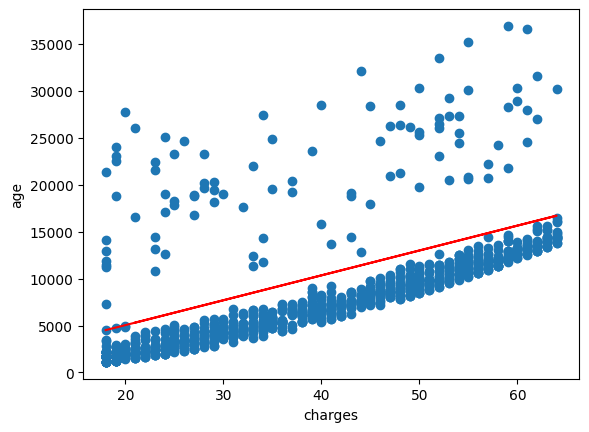

the rmse error is -871.4231818989662


In [76]:
try_parameters_2(265,-260)

so far I changed  so many w and b of try_parameters_2 function and got the best rmse as -871.42 

ordinary least square method is used if we have a data set of n<10,000 and gradient descent is used 

if we have a dataset of n>10,000.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better fortsmaller datasets)

Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [81]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



so in conclusion the fit method finds the optimal weights and bais , it find the the best hyperplane

or line for the model using the data proivided as training, in short it learns the relationship 

between the input data(features,X) and output/target(y).



### Arguments for `model.fit(X, y)` in scikit-learn

| Argument | Type        | Description                                      | Example Shape         |
|----------|-------------|--------------------------------------------------|-----------------------|
| X        | array-like  | 2D structure: rows = samples, columns = features | (n_samples, n_features)<br>e.g., (100, 3) |
| y        | array-like  | 1D structure: target/output values               | (n_samples,)<br>e.g., (100,)             |

Accepted types for X and y:

	•	list of lists


	•	NumPy arrays

	
	•	pandas DataFrame (commonly used)
	





In [84]:
#lets see a simple example for this.
x=np.array([[1],[2],[3]])
y=np.array([1,4,9])
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
#now we can see the prediction from this simple model,predict for X ie new_ar
new_ar=np.array([[5],[6],[7]])
print(f"y or prediction from the new X given is {model.predict(new_ar)}")

y or prediction from the new X given is [16.66666667 20.66666667 24.66666667]


so for now, in our dataset we are using 'age' as X , and y as target which includes the charges we 

already have and we will use that to finf the charges we need to predict.

but for model.fit(X,y) X needs to be 2-D ie the (n-samples,n-features), here we only have 1 feature 

'age'. so the shape should be (1064,1)

In [92]:
inputs=df_non_smoker[['age']]
y= df_non_smoker['charges']
print(inputs.shape,y.shape)
print(type(inputs))
model.fit(inputs,y)

(1064, 1) (1064,)
<class 'pandas.core.frame.DataFrame'>


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
#now we can predict the charges of a person from the age given.
new_val=pd.DataFrame([[21],[50],[90]],columns=['age'])#these are the new ages we are checking
prediction=model.predict(new_val)
print(prediction)

[ 3520.80661289 11271.02508499 21960.98159824]


In [102]:
ig2=px.scatter(df_non_smoker,y='charges',x='age')
fig2.show()